In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(100)


In [3]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
print(f"anaemia",df.anaemia.unique())
print(f"creatinine_phosphokinase",df.creatinine_phosphokinase.unique())
print(f"diabetes",df.diabetes.unique())
print(f"ejection_fraction",df.ejection_fraction.unique())
print(f"high_blood_pressure",df.high_blood_pressure.unique())
print(f"platelets",df.platelets.unique())
print(f"serum_creatinine",df.serum_creatinine.unique())
print(f"serum_sodium",df.serum_sodium.unique())
print(f"sex",df.sex.unique())
print(f"smoking",df.smoking.unique())
print(f"time",df.time.unique())
print(f"DEATH_EVENT",df.DEATH_EVENT.unique())

anaemia [0 1]
creatinine_phosphokinase [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 2442  776
  196  835 3966  171  198   95 1419  478  176  395   99  145  104 1896
  151  244   62  121  418  167 1211 1767  308   97   64  101  212 2281
  972  131  135 1202  427 1021  118   86  675   57 2794   56  211  166
   93  707  119  232  720  180   90 1185 2017  624  207 2522  572  245
   88  446  191  326  655  258  298 11

In [6]:
print(df.isnull().values.any())
print(df.shape)

False
(299, 13)


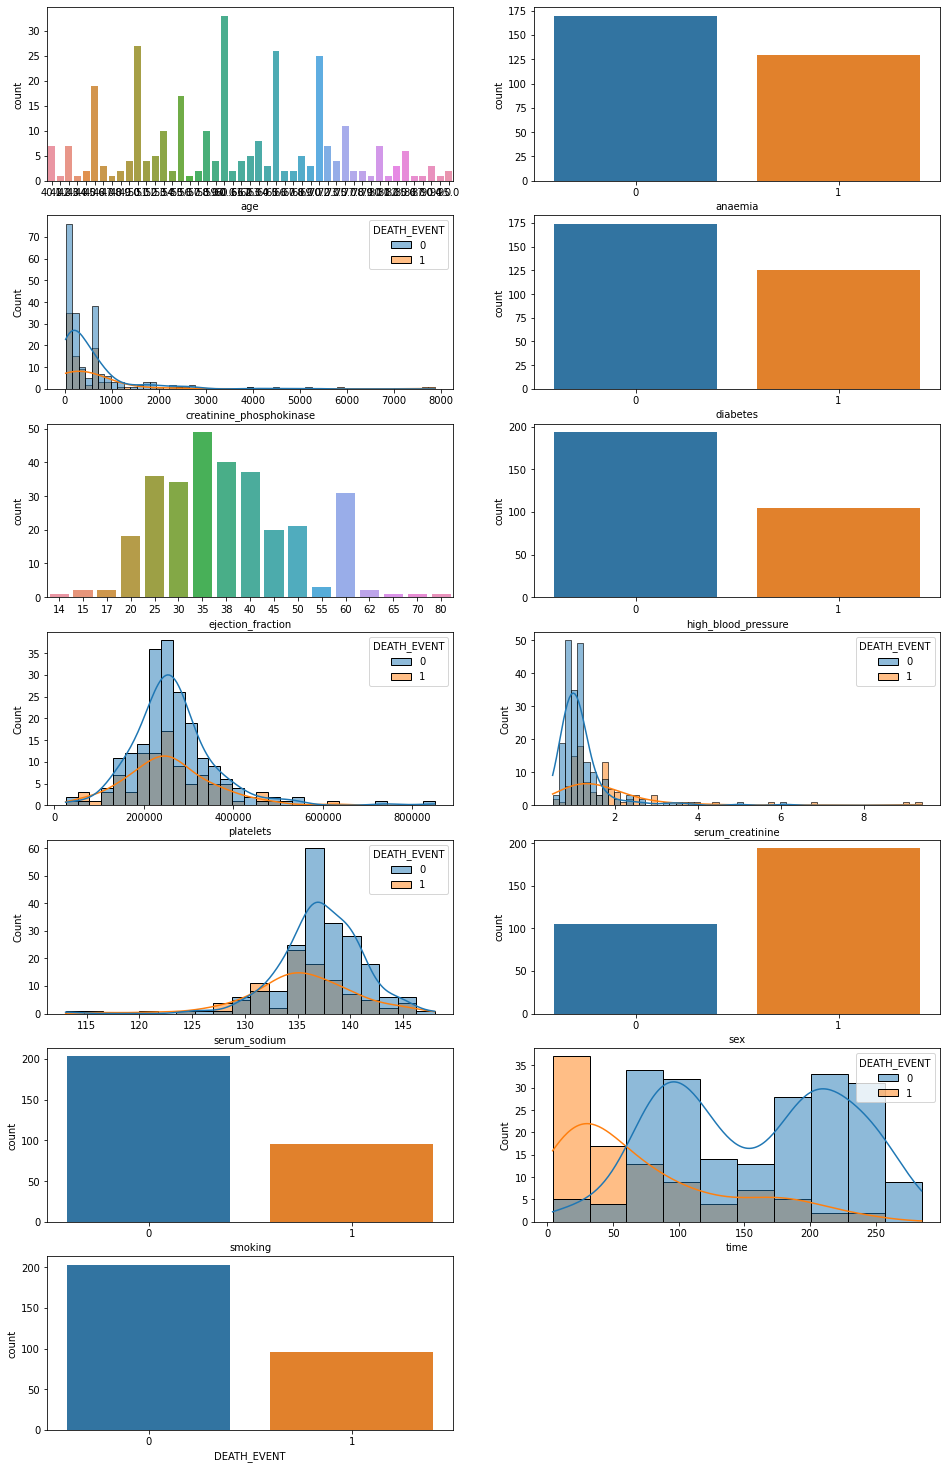

In [7]:
display=plt.figure(figsize=(16, 30))

for index, column in enumerate(list(df.columns.values)):
    display.add_subplot(8, 2, index + 1)
    hist_types = ['creatinine_phosphokinase', 'ejection_fraction ', \
                  'platelets', 'serum_creatinine','serum_sodium','time']
    if column in hist_types:
        sns.histplot(data=df, x=column , kde=True, hue='DEATH_EVENT')
    else:
        sns.countplot(data=df, x=column)

plt.show()

In [8]:
# df = pd.get_dummies(df, columns=['creatinine_phosphokinase', 'ejection_fraction', \
#                   'platelets', 'serum_creatinine','serum_sodium','time'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Split the dataset into test and train data

In [10]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=25)

In [11]:
print(f"Number of training examples: {train_data.shape[0]}")
print(f"Number of testing examples: {test_data.shape[0]}")

Number of training examples: 239
Number of testing examples: 60


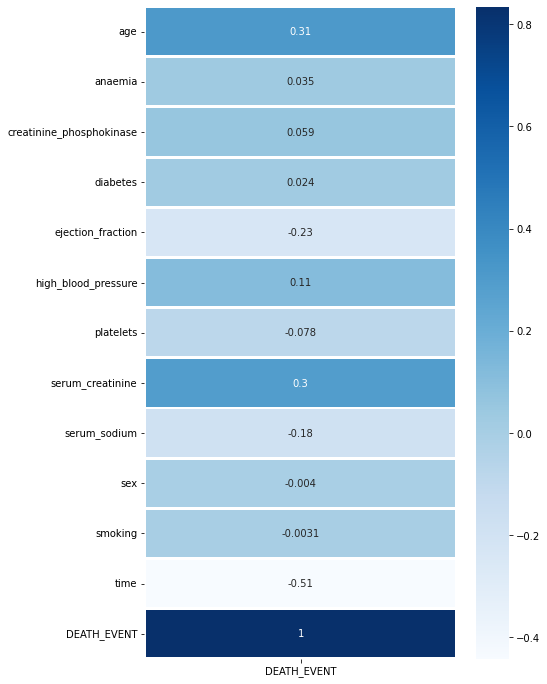

In [12]:
from matplotlib.colors import ListedColormap

cols = list(train_data.columns)
# print(cols)
corr_data = train_data.corr()

corr_data = np.asarray(train_data[cols].corr()['DEATH_EVENT'][:])
# print(corr_data.shape)
corr_data.reshape(13,1)
# print(corr_data.shape)

f, ax = plt.subplots(figsize=(7, 12))
# Generate a mask for upper traingle
# mask = np.triu(np.ones_like(corr_data, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_data[:, np.newaxis], annot=True,annot_kws={"size": 10}, \
            linewidths=2,cmap='Blues', robust=True, xticklabels=["DEATH_EVENT"], yticklabels=cols)

In [13]:
from sklearn.linear_model import LogisticRegression
x = train_data.loc[:, train_data.columns != 'DEATH_EVENT']
y = train_data['DEATH_EVENT']

model = LogisticRegression(random_state=0).fit(x, y)

In [14]:
y_pred = model.predict(x)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y)

0.8117154811715481

After training the model on our training dataset, we can see that the baseline model produces an accuracy of 94.6%. Now, we will selectively remove values based on the correlation we found in our correlation computation.

Looking at the correlation data, we can see that there are a few labels with high correlation to 'stroke' prediction. We will randomly remove 1%, 5%, and 10% of these values to see how they affect model accuracy.

In [15]:
my_data = corr_data[:, np.newaxis]
type(my_data)
my_data = [arr.tolist() for arr in my_data]
my_data = [item for sublist in my_data for item in sublist]

d = sorted(my_data, reverse=True)[0:4]
# type(d[0])
print(d)
t = list(corr_data[:, np.newaxis])
names=[]
indicies = []
for i in range(1,4):
  temp = t.index(d[i])
  names.append(cols[temp])
  indicies.append(temp)

print(names)
print(indicies)

[1.0, 0.31122835745894356, 0.29568847106588503, 0.11275894373948907]
['age', 'serum_creatinine', 'high_blood_pressure']
[0, 7, 5]


In [22]:
import random

percent_removed = 0.10

num_removed = int(np.round(percent_removed*len(test_data)))
# print(num_removed)

smalltest = test_data

# print(type(num_removed))
remove = random.sample(range(len(smalltest)), num_removed)
# print(len(remove))
# first = smalltest.iloc[remove,indicies]
# print(first)
smalltest.iloc[remove,indicies] = np.nan

In [23]:
smalltest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 81 to 113
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       53 non-null     float64
 1   anaemia                   60 non-null     int64  
 2   creatinine_phosphokinase  60 non-null     int64  
 3   diabetes                  60 non-null     int64  
 4   ejection_fraction         60 non-null     int64  
 5   high_blood_pressure       53 non-null     float64
 6   platelets                 60 non-null     float64
 7   serum_creatinine          53 non-null     float64
 8   serum_sodium              60 non-null     int64  
 9   sex                       60 non-null     int64  
 10  smoking                   60 non-null     int64  
 11  time                      60 non-null     int64  
 12  DEATH_EVENT               60 non-null     int64  
dtypes: float64(4), int64(9)
memory usage: 6.6 KB


In [24]:
print(smalltest.shape)
smalltest = smalltest.dropna()
print(smalltest.shape)

(60, 13)
(53, 13)


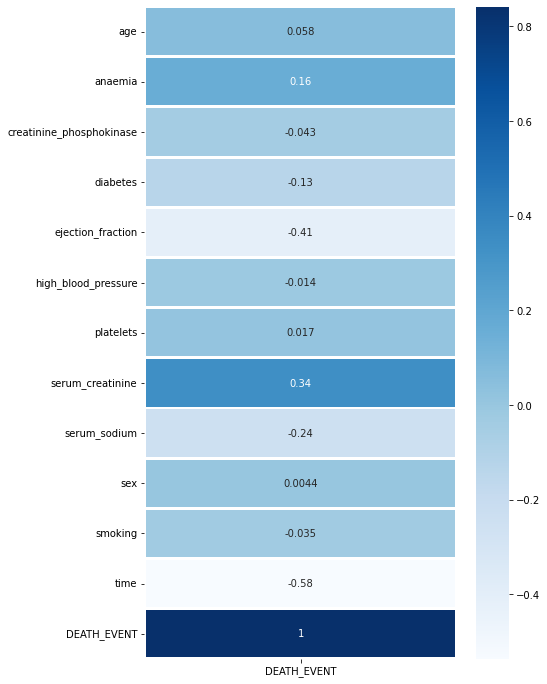

In [25]:
cols = list(smalltest.columns)
# print(cols)
corr_data = smalltest.corr()

corr_data = np.asarray(smalltest[cols].corr()['DEATH_EVENT'][:])
# print(corr_data.shape)
corr_data.reshape(13,1)
# print(corr_data.shape)

f, ax = plt.subplots(figsize=(7, 12))
# Generate a mask for upper traingle
# mask = np.triu(np.ones_like(corr_data, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_data[:, np.newaxis], annot=True,annot_kws={"size": 10}, \
            linewidths=2,cmap='Blues', robust=True, xticklabels=["DEATH_EVENT"], yticklabels=cols)

In [26]:
# from sklearn.linear_model import LogisticRegression
x = smalltest.loc[:, smalltest.columns != 'DEATH_EVENT']
y = smalltest['DEATH_EVENT']

model = LogisticRegression(random_state=0).fit(x, y)

In [27]:
y_pred = model.predict(x)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y)

0.8679245283018868